In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
data=pd.read_csv("diabetes.csv")
df=data.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [279]:
df.shape

(768, 9)

In [280]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [281]:
df.Outcome

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [282]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [283]:
from imblearn.over_sampling import RandomOverSampler
nm = RandomOverSampler()

{'whiskers': [<matplotlib.lines.Line2D at 0x23af586f6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23af586fc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x23af586f400>,
 'medians': [<matplotlib.lines.Line2D at 0x23af5898250>,
 'fliers': [<matplotlib.lines.Line2D at 0x23af5898520>,
 'means': []}

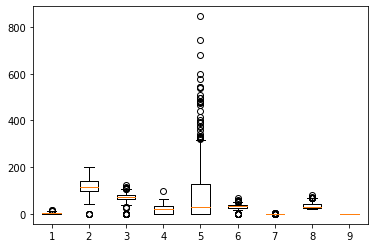

In [284]:
plt.boxplot(df)

In [285]:
y=df.Outcome
X=df.drop("Outcome",axis=1)

In [286]:
X_resampled, y_resampled = nm.fit_resample(X, y)

In [287]:
y_resampled.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

<AxesSubplot:>

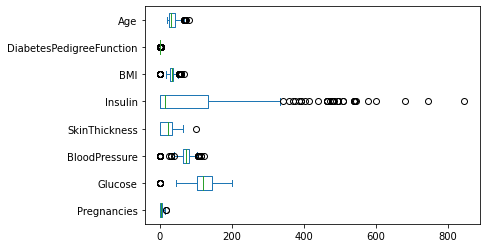

In [288]:
X_resampled.plot(kind="box",vert=False)

In [289]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_resampled, y_resampled, test_size = 0.2, random_state = 0)

In [290]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [291]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [292]:
parameters = {
    "booster": ("gbtree", "gblinear", "dart"),
    "verbosity": (0, 1, 2, 3),
    "validate_parameters": (True, False),
    "disable_default_eval_metric": (True, False),
    "eta": list(np.arange(0, 1.1, 0.1)),
    "subsample": list(np.arange(0, 1.1, 0.1)),
}


In [293]:
xgb_model = xgb.XGBClassifier(random_state=0)

In [294]:
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.88

In [295]:
clf = RandomizedSearchCV(xgb_model, parameters, random_state=0)

In [296]:
clf.fit(X_train, y_train)

[11:42:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:42:10] ======== Monitor (0): Learner ========
[11:42:10] Configure: 0s, 1 calls @ 0us

[11:42:10] EvalOneIter: 0.000309s, 100 calls @ 309us

[11:42:10] GetGradient: 0.001209s, 100 calls @ 1209us

[11:42:10] PredictRaw: 0.001092s, 100 calls @ 1092us

[11:42:10] UpdateOneIter: 0

RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256, max_c...
                   param_distributions={'booster': ('gbtree', 'gblinear',
                                                    'dart'),
                                        'disable_default_eval_metric': (True,
                                                                        False),
                                        'eta': [0.0, 0.1, 0.2,
                                                0.30000000000000004, 0.4, 0.5,
                                                0.6000000000000001,
                                                0.7000000000000001, 0.8, 0.9,
                                                1.0],
                                        'subsample': [0.0, 0.1, 0.2,
                                                      0.30000000000000004, 0.4,
                                                      0.5, 0.6000000000000001,
                                                      0.7000000000000001, 0.8,
                                                      0.9, 1.0],
                                        'validate_parameters': (True, False),
                                        'verbosity': (0, 1, 2, 3)},
                   random_state=0)

In [297]:
print(" Results from Grid Search ")
print("\n The best estimator across ALL searched params:\n",clf.best_estimator_)
print("\n The best score across ALL searched params:\n",clf.best_score_)
print("\n The best parameters across ALL searched params:\n",clf.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              disable_default_eval_metric=False, early_stopping_rounds=None,
              enable_categorical=False, eta=0.7000000000000001,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

 The best score across ALL searched params:
 0.8162499999999999

 The best parameters across ALL searched params:
 {'verbosity': 1, 'validate_parameters': False, 'subsample': 0.8, 'eta': 0.70

In [ ]:
clf = GridSearchCV(xgb_model, parameters)
clf.fit(X_train, y_train)

In [ ]:
print(" Results from Grid Search ")
print("\n The best estimator across ALL searched params:\n",clf.best_estimator_)
print("\n The best score across ALL searched params:\n",clf.best_score_)
print("\n The best parameters across ALL searched params:\n",clf.best_params_)